# Lab 4 Part I

This script is develoepd for AAE 722 Machine Learning in Applied Economic Analysis

Textbook: ISL

copyright: Jing Yi, jing.yi@wisc.edu

# Lab 4 Part II: Logistic Regression
by Pragya Mittal


## Python Library Documentation

https://islp.readthedocs.io/en/latest/

https://islp.readthedocs.io/en/latest/models/spec.html

https://scikit-learn.org/stable/


## Options


In [35]:
import pandas as pd

pd.set_option('display.max_columns', 2)
pd.set_option('display.max_row', 3)
pd.set_option('display.width', None)

import warnings
warnings.filterwarnings("ignore")

import ISLP 
df = ISLP.load_data('Boston')
print(df.head(2))

      crim  ...  medv
0  0.00632  ...  24.0
1  0.02731  ...  21.6

[2 rows x 13 columns]


In [39]:
import pandas as pd

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_row', 10)
pd.set_option('display.width', None)

# deprecated features/outdated, potential code inefficiencies, or resource warnings
import warnings
warnings.filterwarnings("ignore")

import ISLP 
df = ISLP.load_data('Boston')
print(df.head(2))

      crim    zn  indus  chas    nox  ...  rad  tax  ptratio  lstat  medv
0  0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6

[2 rows x 13 columns]


## Export to latex file

## Auto Dataset: Non-linear Relationship
- Gas mileage, horsepower, and other information for 392 vehicles.

- mpg: miles per gallon

- cylinders: Number of cylinders between 4 and 8

- displacement: Engine displacement (cu. inches)

- horsepower: Engine horsepower

- weight: Vehicle weight (lbs.)

- acceleration: Time to accelerate from 0 to 60 mph (sec.)

- year: Model year (modulo 100)

- origin: Origin of car (1. American, 2. European, 3. Japanese)

- name: Vehicle name


                            mpg  cylinders  displacement  horsepower  weight  \
name                                                                           
chevrolet chevelle malibu  18.0          8         307.0         130    3504   
buick skylark 320          15.0          8         350.0         165    3693   
plymouth satellite         18.0          8         318.0         150    3436   
amc rebel sst              16.0          8         304.0         150    3433   
ford torino                17.0          8         302.0         140    3449   

                           acceleration  year  origin  
name                                                   
chevrolet chevelle malibu          12.0    70       1  
buick skylark 320                  11.5    70       1  
plymouth satellite                 11.0    70       1  
amc rebel sst                      12.0    70       1  
ford torino                        10.5    70       1  


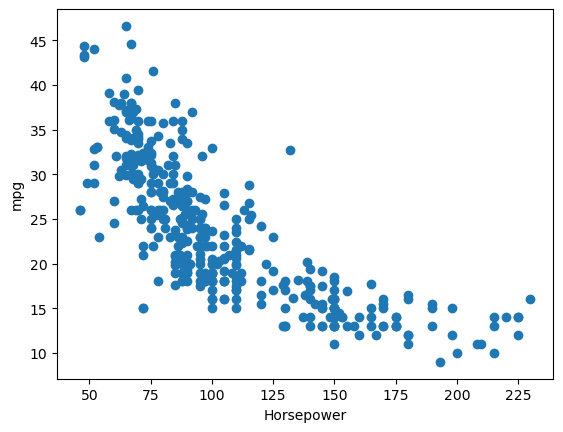

                           const  horsepower  hp_sq
name                                               
chevrolet chevelle malibu    1.0         130  16900
buick skylark 320            1.0         165  27225
plymouth satellite           1.0         150  22500
amc rebel sst                1.0         150  22500
ford torino                  1.0         140  19600
...                          ...         ...    ...
ford mustang gl              1.0          86   7396
vw pickup                    1.0          52   2704
dodge rampage                1.0          84   7056
ford ranger                  1.0          79   6241
chevy s-10                   1.0          82   6724

[392 rows x 3 columns]
name
chevrolet chevelle malibu    18.0
buick skylark 320            15.0
plymouth satellite           18.0
amc rebel sst                16.0
ford torino                  17.0
                             ... 
ford mustang gl              27.0
vw pickup                    44.0
dodge rampage          

In [3]:
import ISLP
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)


df_auto = ISLP.load_data('Auto')
print(df_auto.head())
plt.scatter(df_auto.horsepower, df_auto.mpg)
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.show()

df_auto['hp_sq'] = df_auto['horsepower'] **2
X = df_auto[['horsepower','hp_sq']]
X = sm.add_constant(X)
y = df_auto['mpg']
print(X)
print(y)
model_auto = sm.OLS(y,X).fit()
print(model_auto.summary())

In [ ]:
# pip install docx

In [ ]:
# pip install python-docx

## Export Regression Results

In [32]:
from docx import Document

# 1. Export to Excel
# Convert the summary to a table using pandas
# Extract coefficient table from summary
summary_table = model_auto.summary2().tables[1]  
summary_table.to_excel('regression_results.xlsx')

# 2. Export to LaTeX
latex_output = model_auto.summary().as_latex()
with open('regression_results.tex', 'w') as f:
    f.write(latex_output)
    
# 3. Export to Word
# Create a new Word document
doc = Document()
# Add a title to the Word document
doc.add_heading('OLS Regression Results', 0)
# Add the summary text to the document
doc.add_paragraph(model_auto.summary().as_text())
# Save the document
doc.save('regression_results.docx')

                           const  horsepower
name                                        
chevrolet chevelle malibu    1.0         130
buick skylark 320            1.0         165
plymouth satellite           1.0         150
amc rebel sst                1.0         150
ford torino                  1.0         140
...                          ...         ...
ford mustang gl              1.0          86
vw pickup                    1.0          52
dodge rampage                1.0          84
ford ranger                  1.0          79
chevy s-10                   1.0          82

[392 rows x 2 columns]
name
chevrolet chevelle malibu    18.0
buick skylark 320            15.0
plymouth satellite           18.0
amc rebel sst                16.0
ford torino                  17.0
                             ... 
ford mustang gl              27.0
vw pickup                    44.0
dodge rampage                32.0
ford ranger                  28.0
chevy s-10                   31.0
Name: mpg, L

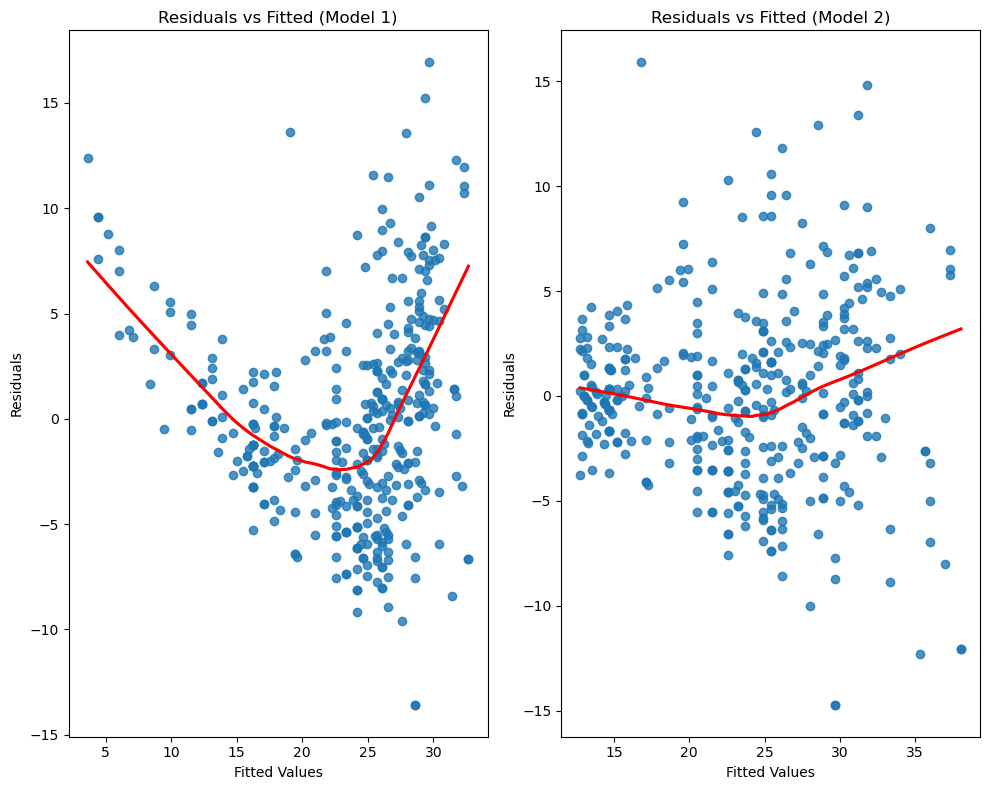

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


X = df_auto[['horsepower']]
X = sm.add_constant(X)
y = df_auto['mpg']
print(X)
print(y)
model_auto_0 = sm.OLS(y,X).fit()


df_auto['hp_sq'] = df_auto['horsepower'] **2
X = df_auto[['horsepower','hp_sq']]
X = sm.add_constant(X)
y = df_auto['mpg']
print(X)
print(y)
model_auto = sm.OLS(y,X).fit()
print(model_auto.summary())

# Create a 1 row, 2 column subplot
fig, ax = plt.subplots(1, 2, figsize=(10, 8))  # 1 row, 2 columns, figure size

# First plot: LOESS regression for model_auto_0
sns.regplot(x=model_auto_0.fittedvalues, y=model_auto_0.resid, lowess=True, line_kws={'color': 'red'}, ax=ax[0])
ax[0].set_xlabel('Fitted Values')
ax[0].set_ylabel('Residuals')
ax[0].set_title('Residuals vs Fitted (Model 1)')

# Second plot: LOESS regression for model_auto
sns.regplot(x=model_auto.fittedvalues, y=model_auto.resid, lowess=True, line_kws={'color': 'red'}, ax=ax[1])
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residuals vs Fitted (Model 2)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

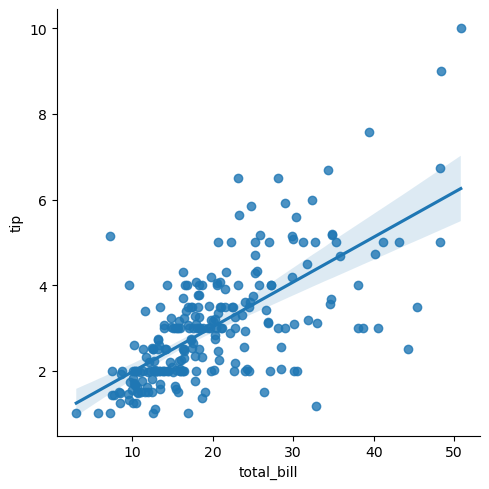

In [46]:
import seaborn as sns
import pandas as pd

# Load example dataset
df = sns.load_dataset('tips')

# Create a scatterplot with a linear fit
sns.lmplot(x='total_bill', y='tip', data=df, ci=95)

# Additional Explanations about Confidence Intervals

## Import Data

A data set containing housing values in 506 suburbs of Boston.

* crim: per capita crime rate by town.

* zn: proportion of residential land zoned for lots over 25,000 sq.ft.

* indus: proportion of non-retail business acres per town.

* chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox: nitrogen oxides concentration (parts per 10 million).

* rm: average number of rooms per dwelling.

* age: proportion of owner-occupied units built prior to 1940.

* dis: weighted mean of distances to five Boston employment centres.

* rad: index of accessibility to radial highways.

* tax: full-value property-tax rate per $10,000.

* ptratio: pupil-teacher ratio by town.

* lstat: lower status of the population (percent).

    **Proportion of population that is lower status = 1/2 (proportion of adults without, some high school education and proportion of male workers classified as laborers).**

* medv: median value of owner-occupied homes in $1000s.

In [8]:
from ISLP import load_data
Boston = load_data('Boston')
print(Boston.columns)
print(Boston.describe())
print(Boston['medv'].describe())

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.00000

## Scatter Plot

Each scatter plot in the matrix helps us understand the correlation between the corresponding pair of attributes. 

The diagonal contains the histograms for each feature. 

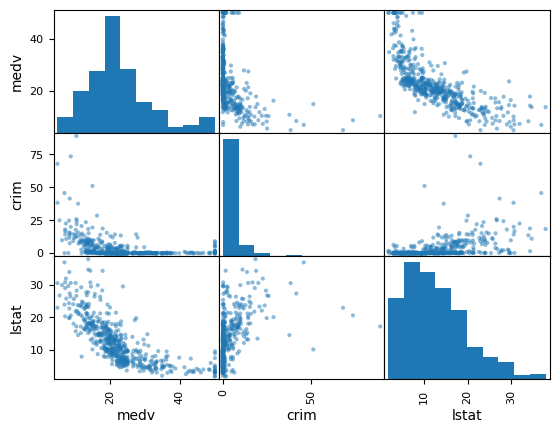

In [9]:
df_Boston = Boston[['medv','crim','lstat']]
# pd.plotting.scatter_matrix(df_Boston)

from pandas.plotting import scatter_matrix
scatter_matrix(df_Boston)
plt.show()

         crim    zn  indus  chas   nox    rm   age   dis   rad   tax  ptratio  \
crim     1.00  0.20   0.41  0.06  0.42  0.22  0.35  0.38  0.63  0.58     0.29   
zn       0.20  1.00   0.53  0.04  0.52  0.31  0.57  0.66  0.31  0.31     0.39   
indus    0.41  0.53   1.00  0.06  0.76  0.39  0.64  0.71  0.60  0.72     0.38   
chas     0.06  0.04   0.06  1.00  0.09  0.09  0.09  0.10  0.01  0.04     0.12   
nox      0.42  0.52   0.76  0.09  1.00  0.30  0.73  0.77  0.61  0.67     0.19   
rm       0.22  0.31   0.39  0.09  0.30  1.00  0.24  0.21  0.21  0.29     0.36   
age      0.35  0.57   0.64  0.09  0.73  0.24  1.00  0.75  0.46  0.51     0.26   
dis      0.38  0.66   0.71  0.10  0.77  0.21  0.75  1.00  0.49  0.53     0.23   
rad      0.63  0.31   0.60  0.01  0.61  0.21  0.46  0.49  1.00  0.91     0.46   
tax      0.58  0.31   0.72  0.04  0.67  0.29  0.51  0.53  0.91  1.00     0.46   
ptratio  0.29  0.39   0.38  0.12  0.19  0.36  0.26  0.23  0.46  0.46     1.00   
lstat    0.46  0.41   0.60  

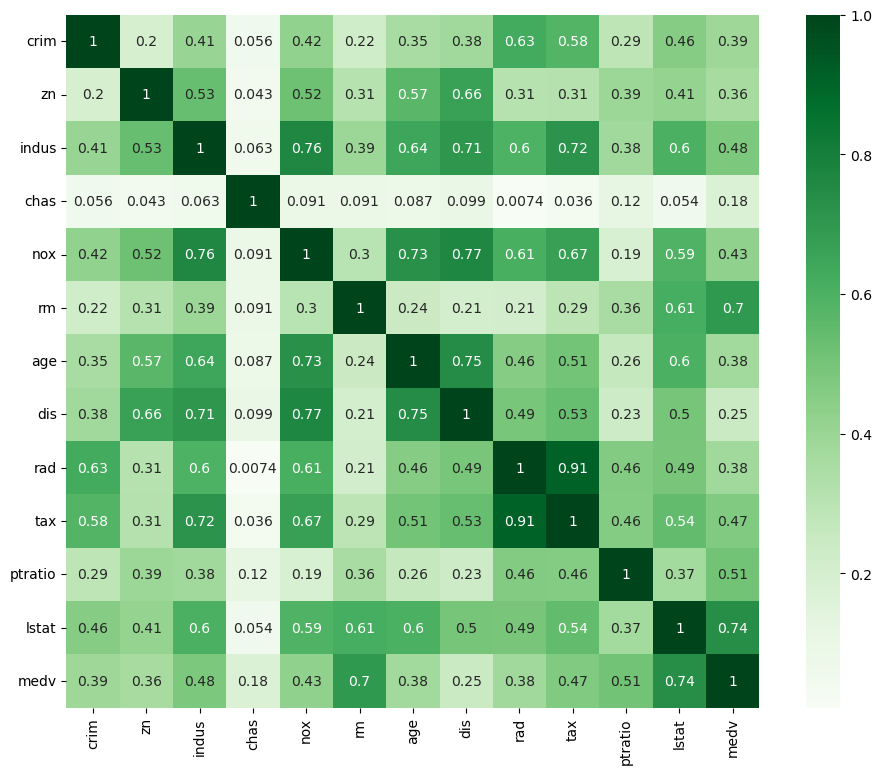

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = Boston.corr().abs()
print(corr_matrix.round(2))
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='Purples')
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, cmap='Greens')
# Greens; PiYG
# https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
plt.xticks(rotation=90)
plt.yticks(rotation=0);

<Axes: >

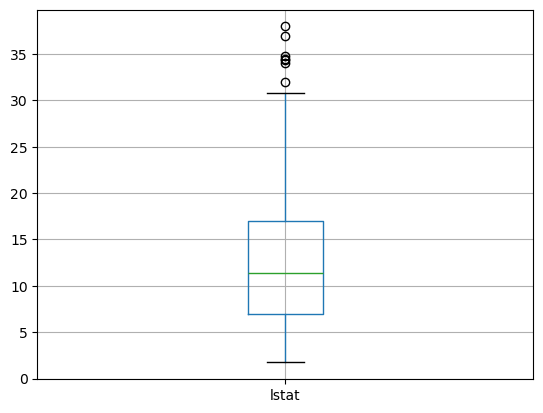

In [57]:
Boston.boxplot('lstat')

## Linear Regression

In [11]:
import pandas as pd
import numpy as np
X = pd.DataFrame({'intercept': np.ones(Boston.shape [0]),
'lstat': Boston['lstat']})

### Model Estimations

In [12]:
import statsmodels.api as sm 
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)

y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        10:33:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.0

In [14]:
results.predict()[:10]

array([29.8225951 , 25.87038979, 30.72514198, 31.76069578, 29.49007782,
       29.60408375, 22.74472741, 16.36039575,  6.11886372, 18.30799693])

In [15]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
design = MS(['lstat'])
design = design.fit(Boston)
newX = design.transform(new_df)
print(newX)

   intercept  lstat
0        1.0      5
1        1.0     10
2        1.0     15


### Predictions

In [84]:
print(results.params[0] + results.params[1] * new_df)
print('func:')

print('The 2nd Method:')
print(results.predict(newX))

print('Compare:')
print(results.predict()[:10])

print('The 3rd Method:')
new_predictions = results.get_prediction(newX)
predicted_mean = new_predictions.predicted_mean
print(predicted_mean)

       lstat
0  29.803594
1  25.053347
2  20.303101
func:
The 2nd Method
0    29.803594
1    25.053347
2    20.303101
dtype: float64
Compare
[29.8225951  25.87038979 30.72514198 31.76069578 29.49007782 29.60408375
 22.74472741 16.36039575  6.11886372 18.30799693]
The 3rd Method
[29.80359411 25.05334734 20.30310057]


**When you make predictions, it's important to understand how confident you can be in these predictions, given the uncertainty in the estimated model coefficients. Confidence intervals quantify this uncertainty.**

### Explanation of `new_predictions` and `.conf_int()` Method

- **`new_predictions`**: This refers to the object returned by the `get_prediction()` method of the fitted regression model. This method generates predicted values along with additional statistics (such as standard errors) for the predictions.

- **`.conf_int(alpha=0.05)`**: This method is used to calculate the **confidence intervals** for the predicted values. The `alpha` parameter specifies the significance level, which determines the confidence level of the intervals.

- **`alpha=0.05`**: This sets the significance level at **5%**, meaning the confidence level will be **95%** (since \( 1 - \alpha = 0.95 \)). A **95% confidence interval** means that there is a 95% chance that the true value will lie within the calculated confidence interval for each prediction.



In [170]:
df_ci = new_predictions.conf_int(alpha =0.05)
print(df_ci)

[[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]


In [172]:
df_ci = new_predictions.conf_int(alpha =0.01)
print(df_ci)

[[28.75577877 30.85140945]
 [24.29107117 25.81562352]
 [19.5509618  21.05523935]]


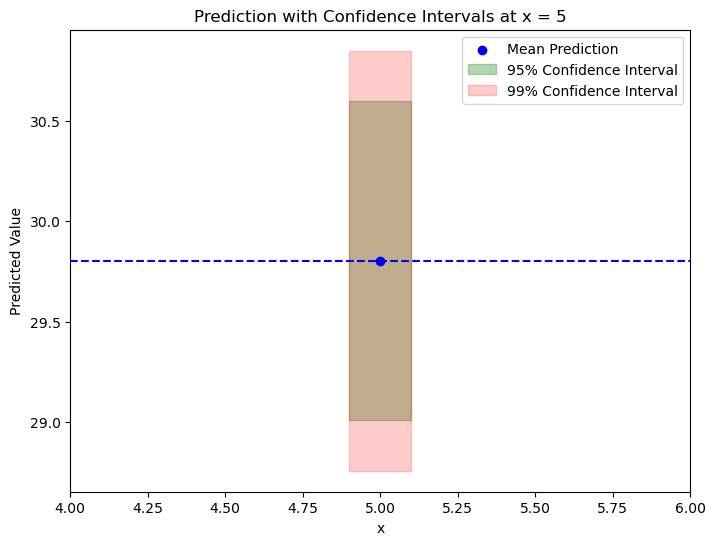

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the prediction and confidence intervals
x_1 = 5
mean_prediction = 29.803594
ci_95 = [29.00741194, 30.59977628]
ci_99 = [28.75577877, 30.85140945]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the mean prediction
plt.scatter(x_1, mean_prediction, color='blue', label='Mean Prediction', zorder=3)

# Plot the 95% confidence interval as a shaded area
plt.fill_between([x_1-0.1, x_1+0.1], ci_95[0], ci_95[1], color='green', alpha=0.3, label='95% Confidence Interval')

# Plot the 99% confidence interval as a shaded area
plt.fill_between([x_1-0.1, x_1+0.1], ci_99[0], ci_99[1], color='red', alpha=0.2, label='99% Confidence Interval')

# Add labels and title
plt.axhline(mean_prediction, color='blue', linestyle='--')
plt.title('Prediction with Confidence Intervals at x = 5')
plt.xlabel('x')
plt.ylabel('Predicted Value')
plt.xlim(x_1-1, x_1+1)  # Focus on x = 5

# Add a legend
plt.legend()

# Display the plot
plt.show()

### Manually Calculate the Confidence Interval (Not Required):

**In a real-world dataset, we expect that data points will not follow a perfect, deterministic pattern. This is due to random fluctuations or noise in the process that generated the data. Even with the best-fitting regression model, we cannot perfectly predict every individual observation. There will always be some degree of unexplained variability.**

- For an individual observation, we not only have the uncertainty associated with the model's predicted mean (which is what the confidence interval accounts for), but we also need to account for the **random variation** (or noise) present in the data. This is represented by the **residuals**.

Thus, the prediction interval needs to be wider than the confidence interval because it incorporates both:

1. The **uncertainty in the model's predictions** (just like the confidence interval).
2. The **random variability in the data**, captured by the **residuals** (or error term).


The formula for the confidence interval for a predicted value \( \hat{y}_{new} \) is:

$$
\hat{y}_{new} \pm t_{\alpha/2, df} \cdot SE(\hat{y}_{new})
$$

Where:
- $ \hat{y}_{new} $ is the predicted value for the new observation.
- $ t_{\alpha/2, df} $ is the critical value from the t-distribution for a confidence level of \( 1 - \alpha \) with degrees of freedom \( df \) .
- $ SE(\hat{y}_{new}) $ is the standard error of the prediction.


The standard error of the predicted value \( \hat{y}_{new} \) is calculated as:

$$
SE(\hat{y}_{new}) = \sqrt{x_{new}^\top \Sigma x_{new}}
$$

Where:
- $ x_{new} $ is the new observations
- $\Sigma $ is the covariance matrix of the estimated coefficients.


In [91]:
from scipy import stats

print('x new:\n',newX)
cov_matrix = results.cov_params()
print('cov_matrix:\n',cov_matrix)

se_predictions = np.array([np.sqrt(np.dot(np.dot(x, cov_matrix), x.T)) for x in newX.values])
print('se_predictions:',se_predictions)

n = len(y)  # Number of observations
p = len(results.params) 
# Degrees of freedom
df = n - p

t_value = stats.t.ppf(1 - 0.025, df)  # 95% CI, two-tailed
print(t_value)
ci_lower = predicted_mean - t_value * se_predictions
ci_upper = predicted_mean + t_value * se_predictions

print(ci_lower)
print(ci_upper)

confidence_intervals = pd.DataFrame({
    'Prediction': predicted_mean,
    'Lower Bound': ci_lower,
    'Upper Bound': ci_upper
})
print(confidence_intervals)


x new:
    intercept  lstat
0        1.0      5
1        1.0     10
2        1.0     15
cov_matrix:
            intercept     lstat
intercept   0.316550 -0.018983
lstat      -0.018983  0.001500
se_predictions: [0.40524735 0.29481378 0.29089309]
1.964682003389552
[29.00741194 24.47413202 19.73158815]
[30.59977628 25.63256267 20.87461299]
   Prediction  Lower Bound  Upper Bound
0   29.803594    29.007412    30.599776
1   25.053347    24.474132    25.632563
2   20.303101    19.731588    20.874613


### Prediction Interval

#### Mathematical Representation:

- The **confidence interval** for a predicted mean value \( \hat{y}_{new} \) only includes the uncertainty of the model's coefficients, as reflected by the covariance matrix (\( \Sigma \)):

$$
SE(\hat{y}_{new}) = \sqrt{x_{new}^\top \Sigma x_{new}}
$$

- The **prediction interval**, however, also needs to account for the **random variation in the data** (captured by the residual variance, \( \sigma^2 \)), and hence the standard error for prediction intervals is:

$$
SE_{\text{pred}}(\hat{y}_{new}) = \sqrt{x_{new}^\top \Sigma x_{new} + \sigma^2}
$$

Where:

- \( x_{new}^\top \Sigma x_{new} \) accounts for the model uncertainty (like in the confidence interval).
- \( \sigma^2 \) is the residual variance, representing the random variation in the data.


In [101]:
residual_variance = results.mse_resid  # This is the mean squared error of the residuals
print('residual_variance:',residual_variance)
# Manually calculate the standard error of prediction
se_predictions = np.array([
    np.sqrt(np.dot(np.dot(x, cov_matrix), x.T) + residual_variance) for x in newX.values
])

# Calculate lower and upper bounds of the prediction intervals
pi_lower = predicted_mean - t_value * se_predictions
pi_upper = predicted_mean + t_value * se_predictions

# Combine lower and upper bounds into a DataFrame for display
pi_manual = pd.DataFrame({'Lower Bound': pi_lower, 'Upper Bound': pi_upper})
print('Manual Prediction Intervals:')
print(pi_manual)

residual_variance: 38.63567741731437
Manual Prediction Intervals:
   Lower Bound  Upper Bound
0    17.565675    42.041513
1    12.827626    37.279068
2     8.077742    32.528459


Formula for mean squared error of residuals:

$$
\sigma^2 = \frac{1}{n - p} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2=\frac{1}{n - p} RSS
$$

where:
- *n* is the number of observations,
- *p* is the number of parameters (including the intercept),
- \( y_i \) is the actual observed value,
- \( \hat{y}_i \) is the predicted value from the model.

$$
\text{Var}(\hat{y}_{new}) = \sigma^2 \cdot X_{new}^T \left( X^T X \right)^{-1} X_{new}
$$

where:
- \( X_{new} \) represents the new data for which predictions are being made.
- \( X^T X \) is the matrix product of the original design matrix \( X \) (with all training data points).



In [98]:
new_predictions = results.get_prediction(newX); 
predictions = new_predictions.predicted_mean
print('predictons:',predictions)

# confidence interval (discussed above): 
df_ci = new_predictions.conf_int(alpha =0.05)
print('ci:',df_ci)

# Prediction interval:
df_pred_interval = new_predictions.conf_int(obs=True, alpha=0.05)
print('prediction interal:',df_pred_interval)

intercept    0.562627
lstat        0.038733
dtype: float64
predictons: [29.80359411 25.05334734 20.30310057]
ci: [[29.00741194 30.59977628]
 [24.47413202 25.63256267]
 [19.73158815 20.87461299]]
prediction interal: [[17.56567478 42.04151344]
 [12.82762635 37.27906833]
 [ 8.0777421  32.52845905]]


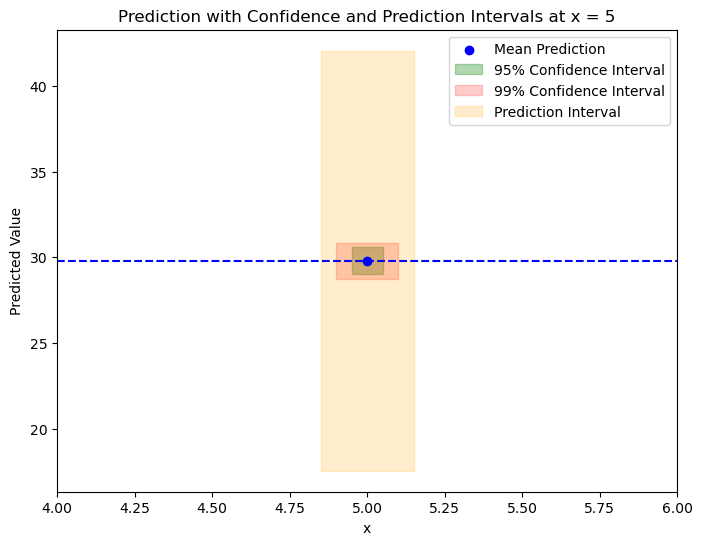

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the prediction, confidence intervals, and prediction interval
x_1 = 5
mean_prediction = 29.803594
ci_95 = [29.00741194, 30.59977628]
ci_99 = [28.75577877, 30.85140945]
prediction_interval = [17.56567478, 42.04151344]

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the mean prediction
plt.scatter(x_1, mean_prediction, color='blue', label='Mean Prediction', zorder=3)

# Plot the 95% confidence interval as a shaded area
plt.fill_between([x_1-0.05, x_1+0.05], ci_95[0], ci_95[1], color='green', alpha=0.3, label='95% Confidence Interval')

# Plot the 99% confidence interval as a shaded area
plt.fill_between([x_1-0.1, x_1+0.1], ci_99[0], ci_99[1], color='red', alpha=0.2, label='99% Confidence Interval')

# Plot the prediction interval as a shaded area
plt.fill_between([x_1-0.15, x_1+0.15], prediction_interval[0], prediction_interval[1], color='orange', alpha=0.2, label='Prediction Interval')

# Add labels and title
plt.axhline(mean_prediction, color='blue', linestyle='--')
plt.title('Prediction with Confidence and Prediction Intervals at x = 5')
plt.xlabel('x')
plt.ylabel('Predicted Value')
plt.xlim(x_1-1, x_1+1)  # Focus on x = 5

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [8]:
terms = Boston.columns.drop('medv')
X = MS(terms).fit_transform(Boston)
print(X)

     intercept     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0          1.0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1          1.0  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2          1.0  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3          1.0  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4          1.0  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..         ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501        1.0  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502        1.0  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503        1.0  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504        1.0  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505        1.0  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio  lstat  
0    296     15.3   4.98

In [12]:
from ISLP.models import (ModelSpec as MS,
summarize , poly)
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 

terms = Boston.columns.drop('medv')
X = MS(terms).fit_transform(Boston)

vals = [VIF(X, i)
for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158
